### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



In [1]:
import pandas as pd

#tenemos un problema de regresion multivariada

In [2]:
path1 = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/DataTrain.xlsx" #este codigo guarda el la ruta del dataset como un string que se encuetra en github.
df_Train = pd.read_excel(f"{path1}")                #Esta linea se utiliza para leer el arcivo de excel que se encuentre en la ruta con nombre "path" , f{"path"} no proporciona el contenido del string.
path2 = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Data_trainVyg.xlsx"
df_TrainVy = pd.read_excel(f"{path2}")

path3 = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/DataTest.xlsx"
df_Test = pd.read_excel(f"{path3}")


In [3]:
df_Train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


In [4]:
df_TrainVy

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
...,...,...,...
106,106,2019042101,7.425
107,107,2019042309,9.335
108,108,2019050700,9.240
109,109,2019052101,7.435


In [5]:
df_Test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


In [6]:
#Queremos saber si hay datos faltantes en el dataset, inicimos con df_TrainVy
df_TrainVy.isna().sum()

vyg          0
Date(UTC)    0
DRAFT        0
dtype: int64

In [7]:
df_TrainVy.isnull().sum()

vyg          0
Date(UTC)    0
DRAFT        0
dtype: int64

In [8]:
df_Train.isna().sum()

Date                    0
Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
dtype: int64

Notamos que los data sets no tienen datos Nan y Null antes de realizar el merge de los dataframe.

In [9]:
#Modificar el formato del horario de la columna "Date(UTC)" de df_TrainVy

df_TrainVy["Date(UTC)"] = pd.to_datetime(df_TrainVy["Date(UTC)"],format="%Y%m%d%H")


In [10]:
#Cambiamos el nobre de la columna de fecha
df_TrainVy = df_TrainVy.rename(columns={'Date(UTC)': 'Date'})
df_TrainVy

,vyg,Date,DRAFT
0,0,2016-06-03 01:00:00,9.175
1,1,2016-06-25 00:00:00,9.250
2,2,2016-06-27 00:00:00,9.365
3,3,2016-06-29 01:00:00,8.645
4,4,2016-07-06 00:00:00,7.805
...,...,...,...
106,106,2019-04-21 01:00:00,7.425
107,107,2019-04-23 09:00:00,9.335
108,108,2019-05-07 00:00:00,9.240
109,109,2019-05-21 01:00:00,7.435


In [11]:
#Cambiamos la posicion de la columna Date en el dataframe df_TrainVy

col = df_TrainVy.pop("Date")

df_TrainVy.insert(0, col.name, col)

df_TrainVy

,Date,vyg,DRAFT
0,2016-06-03 01:00:00,0,9.175
1,2016-06-25 00:00:00,1,9.250
2,2016-06-27 00:00:00,2,9.365
3,2016-06-29 01:00:00,3,8.645
4,2016-07-06 00:00:00,4,7.805
...,...,...,...
106,2019-04-21 01:00:00,106,7.425
107,2019-04-23 09:00:00,107,9.335
108,2019-05-07 00:00:00,108,9.240
109,2019-05-21 01:00:00,109,7.435


In [12]:
#quiero fusinar los dos dataset, utilizando la funcion merge de pandas, iniciamos con el parametro, how="inner"

df_merge1 = pd.merge(df_Train,df_TrainVy, on="Date", how="inner")
df_merge1

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,0,9.175
1,2016-06-25 00:00:00,21.585833,-74.501667,medium,14.6,67,2606914,1,9.250
2,2016-06-27 00:00:00,30.090000,-80.044444,low,7.5,51,2610158,2,9.365
3,2016-06-29 01:00:00,34.770556,-75.068333,low,17.0,72,2613681,3,8.645
4,2016-07-06 00:00:00,9.451667,-80.119167,low,0.2,0,2634008,4,7.805
...,...,...,...,...,...,...,...,...,...
86,2018-09-29 00:00:00,34.795556,137.317500,low,0.0,0,4994713,86,9.385
87,2018-10-20 00:00:00,8.345833,-79.456944,low,9.1,44,5064511,87,9.475
88,2018-10-26 00:00:00,30.336389,-81.083333,medium,12.5,61,5076789,88,9.420
89,2018-10-29 00:00:00,39.498333,-73.551389,low,12.2,61,5081756,89,8.720


In [13]:
#fusionaos los dataset con el parametro how="outer"

df_merge2 = pd.merge(df_Train,df_TrainVy , on="Date", how="outer")
df_merge2

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86.0,2531274.0,0.0,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86.0,2531443.0,NaN,NaN
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86.0,2531608.0,NaN,NaN
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86.0,2531771.0,NaN,NaN
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86.0,2531934.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20015,2019-04-21 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,106.0,7.425
20016,2019-04-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,107.0,9.335
20017,2019-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,108.0,9.240
20018,2019-05-21 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,109.0,7.435


In [14]:
#fusionamos los dataset con el parametro how="right"

df_merge3 = pd.merge( df_Train,df_TrainVy, on="Date", how="right")
df_merge3

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86.0,2531274.0,0,9.175
1,2016-06-25 00:00:00,21.585833,-74.501667,medium,14.6,67.0,2606914.0,1,9.250
2,2016-06-27 00:00:00,30.090000,-80.044444,low,7.5,51.0,2610158.0,2,9.365
3,2016-06-29 01:00:00,34.770556,-75.068333,low,17.0,72.0,2613681.0,3,8.645
4,2016-07-06 00:00:00,9.451667,-80.119167,low,0.2,0.0,2634008.0,4,7.805
...,...,...,...,...,...,...,...,...,...
106,2019-04-21 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,106,7.425
107,2019-04-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,107,9.335
108,2019-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,108,9.240
109,2019-05-21 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,109,7.435


In [15]:
#Ahora queremos fusionar el dataset anterior con el df_Test, utilizando la misma funcion merge, con el parametro how="left"

df_merge = pd.merge( df_Train,df_TrainVy, on="Date", how="left")
df_merge

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,0.0,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,NaN,NaN
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,NaN,NaN
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,NaN,NaN
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,NaN,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,NaN,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,NaN,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,NaN,NaN


In [16]:
#Miremos si hay datos faltantes en los dataset fusionados

print("Datos faltantes en el dataset df_merge1",df_merge1.isna().sum())
print("Datos faltantes en el dataset df_merge2",df_merge2.isna().sum())



Datos faltantes en el dataset df_merge1 Date                    0
Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
vyg                     0
DRAFT                   0
dtype: int64
Datos faltantes en el dataset df_merge2 Date                        0
Latitude_degree            20
Longitude_degree           20
Beaufort                   20
Speed(Ground)              20
M/E REVOLUTION             20
M/E F O FLOW COUNTER       20
vyg                     19909
DRAFT                   19909
dtype: int64


In [17]:
print("Datos faltantes en el dataset df_merge3",df_merge3.isna().sum())
print("Datos faltantes en el dataset df_merge",df_merge.isna().sum())


Datos faltantes en el dataset df_merge3 Date                     0
Latitude_degree         20
Longitude_degree        20
Beaufort                20
Speed(Ground)           20
M/E REVOLUTION          20
M/E F O FLOW COUNTER    20
vyg                      0
DRAFT                    0
dtype: int64
Datos faltantes en el dataset df_merge Date                        0
Latitude_degree             0
Longitude_degree            0
Beaufort                    0
Speed(Ground)               0
M/E REVOLUTION              0
M/E F O FLOW COUNTER        0
vyg                     19909
DRAFT                   19909
dtype: int64


In [18]:
#contemos los ceros en los dataset fusionados

print("Cantidad de ceros en el dataset df_merge1",df_merge1.eq(0).sum())
print("Cantidad de ceros en el dataset df_merge2",df_merge2.eq(0).sum())


Cantidad de ceros en el dataset df_merge1 Date                     0
Latitude_degree          0
Longitude_degree         0
Beaufort                 0
Speed(Ground)           21
M/E REVOLUTION          28
M/E F O FLOW COUNTER     0
vyg                      1
DRAFT                    0
dtype: int64
Cantidad de ceros en el dataset df_merge2 Date                       0
Latitude_degree            0
Longitude_degree           0
Beaufort                   0
Speed(Ground)           1793
M/E REVOLUTION          2604
M/E F O FLOW COUNTER       0
vyg                        1
DRAFT                      0
dtype: int64


In [19]:
print("Cantidad de ceros en el dataset df_merge3",df_merge3.eq(0).sum())
print("Cantidad de ceros en el dataset df_merge",df_merge.eq(0).sum())

Cantidad de ceros en el dataset df_merge3 Date                     0
Latitude_degree          0
Longitude_degree         0
Beaufort                 0
Speed(Ground)           21
M/E REVOLUTION          28
M/E F O FLOW COUNTER     0
vyg                      1
DRAFT                    0
dtype: int64
Cantidad de ceros en el dataset df_merge Date                       0
Latitude_degree            0
Longitude_degree           0
Beaufort                   0
Speed(Ground)           1793
M/E REVOLUTION          2604
M/E F O FLOW COUNTER       0
vyg                        1
DRAFT                      0
dtype: int64


In [20]:
#Calculemos la media de los datos en los dataset fusionados y comparemoslos con los dataset originales

print("Media de los datos en el dataset df_Train",df_Train.mean())


print("Media de los datos en el dataset df_merge1",df_merge1.mean())

Media de los datos en el dataset df_Train Latitude_degree         3.301700e+01
Longitude_degree       -2.966995e+01
Speed(Ground)           1.402410e+01
M/E REVOLUTION          6.961935e+01
M/E F O FLOW COUNTER    3.893131e+06
dtype: float64
Media de los datos en el dataset df_merge1 Latitude_degree         3.213341e+01
Longitude_degree       -4.250928e+00
Speed(Ground)           9.558242e+00
M/E REVOLUTION          4.753846e+01
M/E F O FLOW COUNTER    3.830950e+06
vyg                     4.500000e+01
DRAFT                   8.806429e+00
dtype: float64


<ipython-input-20-c21654a8fd51>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("Media de los datos en el dataset df_Train",df_Train.mean())
<ipython-input-20-c21654a8fd51>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("Media de los datos en el dataset df_merge1",df_merge1.mean())


In [21]:
#Calculemos la media de los datos en los dataset fusionados y comparemoslos con los dataset originales

print("Media de los datos en el dataset df_TrainVy ",df_TrainVy.mean())

print("Media de los datos en el dataset df_merge1",df_merge1.mean())




Media de los datos en el dataset df_TrainVy  vyg      55.000000
DRAFT     8.733333
dtype: float64
Media de los datos en el dataset df_merge1 Latitude_degree         3.213341e+01
Longitude_degree       -4.250928e+00
Speed(Ground)           9.558242e+00
M/E REVOLUTION          4.753846e+01
M/E F O FLOW COUNTER    3.830950e+06
vyg                     4.500000e+01
DRAFT                   8.806429e+00
dtype: float64


<ipython-input-21-f530e47cb551>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("Media de los datos en el dataset df_TrainVy ",df_TrainVy.mean())
<ipython-input-21-f530e47cb551>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print("Media de los datos en el dataset df_merge1",df_merge1.mean())


In [22]:
df_merge.fillna(method='ffill', inplace=True)
df_merge

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,0.0,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,0.0,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,0.0,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,0.0,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,0.0,9.175
...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,90.0,7.610
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,90.0,7.610
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,90.0,7.610
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,90.0,7.610


 Creamos la variable objetivo que representará la diferencia en 'M/E F O FLOW COUNTER'. Utilizando el método diff() de pandas, que calcula la diferencia entre filas sucesivas.

In [23]:
#creamos la variable objetivo que sera la diferencia en 'M/E F O FLOW COUNTER'. Utilizando el método diff()

df_merge["Diff"] = df_merge["M/E F O FLOW COUNTER"].diff()
df_merge

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT,Diff
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,0.0,9.175,NaN
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,0.0,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,0.0,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,0.0,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,0.0,9.175,163.0
...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,90.0,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,90.0,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,90.0,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,90.0,7.610,0.0


analizemos la correlacion incial de los datos


<AxesSubplot:>

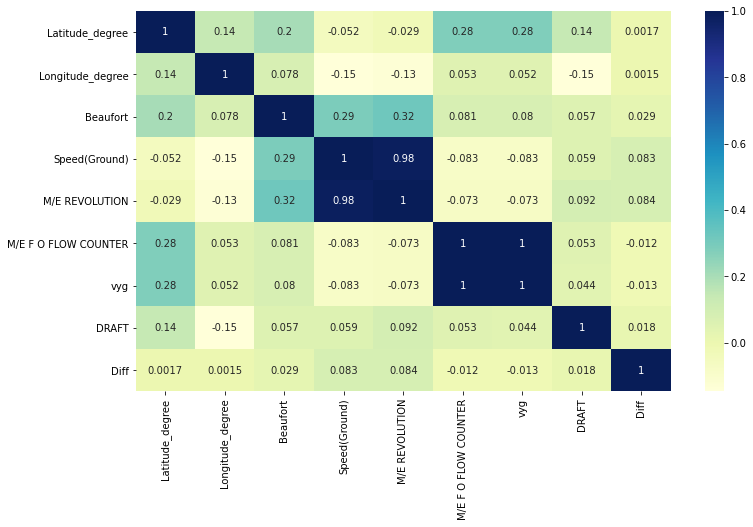

In [68]:
#Calculomos la matriz de correlacion de los dataset fusionados 
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_merge.corr()

plt.figure(figsize=(12,7))

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

Analicemos los outliears presentes en nuetros datos, para mejorar la correlacion de las demas columnas con las columna de diferencia del flujo de combustible.



In [24]:
#cambiamos la variables Beaufort a numerica
hot_code = {'low': 1, 'medium': 2, 'high': 3}

#usamos el metodo replace de pandas para los strings por numeros
df_merge['Beaufort'] = df_merge['Beaufort'].replace(hot_code)
df_merge = df_merge.fillna(0)

df_merge

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT,Diff
0,2016-06-03 01:00:00,35.175000,141.595556,2,17.5,86,2531274,0.0,9.175,0.0
1,2016-06-03 02:00:00,35.315833,141.884444,2,18.3,86,2531443,0.0,9.175,169.0
2,2016-06-03 03:00:00,35.458333,142.121111,2,18.4,86,2531608,0.0,9.175,165.0
3,2016-06-03 04:00:00,35.573611,142.548611,2,18.1,86,2531771,0.0,9.175,163.0
4,2016-06-03 05:00:00,35.939722,142.768889,2,18.8,86,2531934,0.0,9.175,163.0
...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,1,0.0,0,5165079,90.0,7.610,0.0
19996,2018-11-27 06:00:00,34.750556,137.317778,1,0.0,0,5165079,90.0,7.610,0.0
19997,2018-11-27 07:00:00,34.750833,137.317500,1,0.0,0,5165079,90.0,7.610,0.0
19998,2018-11-27 08:00:00,34.751111,137.317500,1,0.0,0,5165079,90.0,7.610,0.0


In [25]:
df_merge.columns

Index(['Date', 'Latitude_degree', 'Longitude_degree', 'Beaufort',
       'Speed(Ground)', 'M/E REVOLUTION', 'M/E F O FLOW COUNTER', 'vyg',
       'DRAFT', 'Diff'],
      dtype='object')

## Eliminamos los outlayers


In [30]:
data1 = df_merge.copy()
data1 = data1.drop(['M/E F O FLOW COUNTER'], axis=1)
data1.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,vyg,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,1.60005,14.024100,69.619350,46.654150,8.695166,131.690250
std,12.263632,129.761046,0.54955,5.924093,29.264823,26.477131,0.734726,598.314204
min,6.571944,-180.195278,1.00000,0.000000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,1.00000,13.400000,67.000000,26.000000,7.855000,87.000000
50%,34.795000,-80.924306,2.00000,16.500000,83.000000,47.000000,9.215000,148.000000
75%,41.496181,138.181319,2.00000,17.600000,87.000000,70.000000,9.365000,172.000000
max,54.626944,180.217500,3.00000,22.100000,95.000000,90.000000,9.495000,77429.000000


<AxesSubplot:>

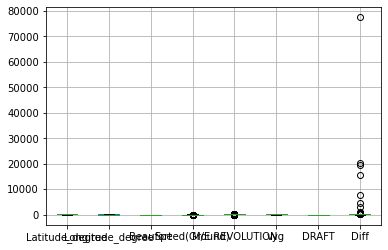

In [31]:
data1.boxplot()


In [32]:
def remove_outliers(column):
    mean_value = column.mean()
    std_value = column.std()
    lower_bound = mean_value - 2.698 * std_value
    upper_bound = mean_value + 2.698 * std_value
    column[(column < lower_bound) | (column > upper_bound)] = mean_value
    return column
     

In [42]:
data2 = data1.drop('Date',axis=1).copy()
data2 = data2.drop('vyg',axis=1)
data2 = data2.apply(remove_outliers, axis=0)
data2.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,1.60005,14.024100,69.619350,8.695166,124.343442
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,64.105849
min,6.571944,-180.195278,1.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,1.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,2.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,2.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,3.00000,22.100000,95.000000,9.495000,827.000000


<AxesSubplot:>

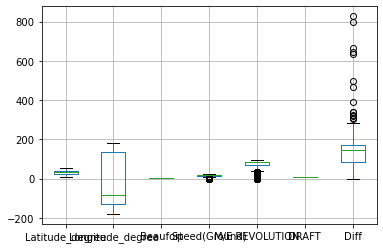

In [43]:
data2.boxplot()

En la grafica aun se pueden distinguir un numero importante de outlayers, por lo que aplicaremos nuevamente la funcion.


In [44]:
data = data2.copy()
data = data.apply(remove_outliers, axis=0)
data.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Diff
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,33.016999,-29.669950,1.60005,14.024100,69.619350,8.695166,124.087332
std,12.263632,129.761046,0.54955,5.924093,29.264823,0.734726,63.186873
min,6.571944,-180.195278,1.00000,0.000000,0.000000,6.890000,0.000000
25%,25.369792,-130.251736,1.00000,13.400000,67.000000,7.855000,87.000000
50%,34.795000,-80.924306,2.00000,16.500000,83.000000,9.215000,148.000000
75%,41.496181,138.181319,2.00000,17.600000,87.000000,9.365000,172.000000
max,54.626944,180.217500,3.00000,22.100000,95.000000,9.495000,282.000000


<AxesSubplot:>

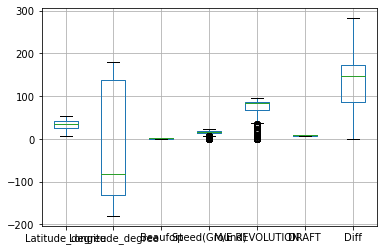

In [45]:
data.boxplot()

Ahora tenemos la variable objetivo Diff libre de outlayers 


## Correlacion de los datos


<AxesSubplot:>

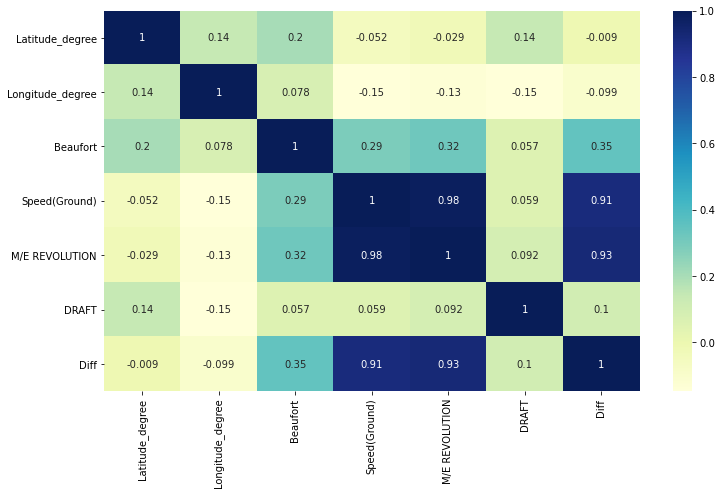

In [46]:
#Calculomos la matriz de correlacion de los dataset fusionados 
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(12,7))

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

Notamos un aumento de sumama importancia en la correlacion, al quitar los outlayers.

In [47]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Diff'], test_size=0.2, random_state=42)
X_train = X_train.drop('Diff', axis=1)
X_test = X_test.drop('Diff', axis=1)
X_train                              #matriz de caracteristicas de entrenamiento(features) 


,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
5894,27.662222,-120.017500,2,16.5,82,9.410
3728,14.548611,-119.832222,2,19.7,93,7.855
8958,49.081389,176.826111,1,16.5,82,9.275
7671,33.610556,-70.173056,2,17.8,88,8.710
5999,14.233333,-96.080000,2,12.3,76,9.410
...,...,...,...,...,...,...
11284,54.564722,-169.190556,1,16.8,87,9.460
11964,40.058333,-179.918056,2,16.2,85,9.460
5390,23.498889,174.908611,2,17.1,87,7.805
860,13.372222,-94.244167,2,18.7,85,7.805


In [54]:
from sklearn.preprocessing import StandardScaler # normalizamos nuestra caracteristicas

scaler = StandardScaler()

X_tr_s = scaler.fit_transform(X_train)

X_ts_s = scaler.transform(X_test)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


m = LinearRegression()
m.fit(X_tr_s, y_train)

y_pred_tr, y_pred_ts = m.predict(X_tr_s), m.predict(X_ts_s)
print(f'R2: {r2_score(y_train, y_pred_tr):.3} (training), {r2_score(y_test, y_pred_ts):.3} (test)')

R2: 0.859 (training), 0.865 (test)


vemos un score similar tanto para los datos de entrenamiento como para los datos de test, si señal aparente de overfitting.


## Implementacion de DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Crear modelo de árbol de decisión
regression_tree = DecisionTreeRegressor()

# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=regression_tree, param_grid=param_grid, cv=5)

# Entrenar el modelo y encontrar los mejores parámetros
grid_search.fit(X_tr_s, y_train)

# Obtener los mejores parámetros de GridSearchCV
best_params = grid_search.best_params_

# Crear un nuevo modelo con los mejores parámetros
best_regression_tree = DecisionTreeRegressor(**best_params)

# Entrenar el modelo con tus datos
best_regression_tree.fit(X_tr_s, y_train)


DecisionTreeRegressor(max_depth=7, min_samples_leaf=7)

In [58]:
# Obtener el puntaje del modelo en los datos de entrenamiento
train_score = best_regression_tree.score(X_tr_s, y_train)

test_score = best_regression_tree.score(X_ts_s, y_test)


# Imprimir el score
print("Score en datos de entrenamiento:", train_score)
print("Score en datos de prueba:", test_score)


Score en datos de entrenamiento: 0.957290285636177
Score en datos de prueba: 0.9530382940111388


utilizando el DecisionTreeRegressor notamos un mejor ajuste del modelo, debido a que el modelo no es completamente lineal, esto se evidencia en la matriz de correlacion donde muchas de las variables no tenia una correlacion lo suficientemente alta.

Ahora realizamos el mismo procedimiento sobre los datos de Test y realizamos predicciones con el modelo entrenado.

In [59]:
# fusionamos el dataset df_TrainVy con el df_Test 

df_TestVy = pd.merge( df_Test, df_TrainVy , on="Date", how="left")
df_TestVy

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,vyg,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,NaN,NaN
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,NaN,NaN
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,NaN,NaN
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,NaN,NaN
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,NaN,NaN
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,NaN,NaN
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,NaN,NaN
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,NaN,NaN


In [64]:

# Elimina columnas no deseadas y aplica codificación one-hot
X_predict = df_TestVy.drop(['Date'], axis=1)
X_predict = X_predict.drop(['vyg'], axis=1)
X_predict['Beaufort'] = X_predict['Beaufort'].replace(hot_code)
X_predict = X_predict.fillna(0)

# Haz predicciones utilizando el modelo entrenado
y_pred = best_regression_tree.predict(X_predict)

# Añade las predicciones como una nueva columna en tu conjunto de datos de prueba
X_predict['DIFF'] = y_pred



,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Predicted_DIFF
0,34.750556,137.318056,1,0.0,0,0.0,104.516484
1,34.751111,137.317222,1,0.0,0,0.0,104.516484
2,34.750556,137.317500,1,0.0,0,0.0,104.516484
3,34.751389,137.317500,1,0.0,0,0.0,104.516484
4,34.750833,137.317500,1,0.0,0,0.0,104.516484
...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,2,17.9,92,0.0,201.054054
4425,33.053056,-131.792500,2,17.8,91,0.0,201.054054
4426,33.093333,-131.602500,2,17.5,91,0.0,201.054054
4427,32.785000,-131.243333,2,17.5,92,0.0,201.054054


In [66]:
X_predict

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Predicted_DIFF
0,34.750556,137.318056,1,0.0,0,0.0,104.516484
1,34.751111,137.317222,1,0.0,0,0.0,104.516484
2,34.750556,137.317500,1,0.0,0,0.0,104.516484
3,34.751389,137.317500,1,0.0,0,0.0,104.516484
4,34.750833,137.317500,1,0.0,0,0.0,104.516484
...,...,...,...,...,...,...,...
4424,33.175278,-132.280278,2,17.9,92,0.0,201.054054
4425,33.053056,-131.792500,2,17.8,91,0.0,201.054054
4426,33.093333,-131.602500,2,17.5,91,0.0,201.054054
4427,32.785000,-131.243333,2,17.5,92,0.0,201.054054


In [67]:
X_predict.describe()

,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT,Predicted_DIFF
count,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,31.162111,-13.430771,1.657936,13.665500,67.622488,0.037935,185.281565
std,8.559746,140.727562,0.515954,6.068101,31.735437,0.566256,35.662586
min,6.921111,-180.132500,1.000000,0.000000,0.000000,0.000000,104.516484
25%,30.001944,-138.894167,1.000000,12.600000,65.000000,0.000000,201.054054
50%,32.811944,-81.551944,2.000000,16.500000,84.000000,0.000000,201.054054
75%,34.841111,139.728889,2.000000,17.600000,87.000000,0.000000,201.054054
max,50.258611,180.041667,3.000000,20.800000,95.000000,9.460000,201.054054


## Conclusiones

Notamos que el rango de valores de la prediccion del modelo, se encuentra dentro del rango de valores del dataset de entrenamiento, luego de quitar los outlayers, por lo cual el modelo parece estar haciendo predicciones adecuadas de la diferencia de combustible en el dataframe de Test.

El modelo tuvo una score del $95%$, considero que esto se debe al tratamiento de los outlayer, debido a que incialmente no se evidenciaba una correlacion adecuanda entre las varibles del problema para un modelo de regresion.